# Time Series


Time-series data consists of observations recorded over time at regular intervals, known as frequency. These intervals can range from hourly to yearly or even second-wise, depending on the events being observed. Time-series analysis involves extracting valuable insights and patterns from such data. It serves to comprehend past events and forecast future occurrences.


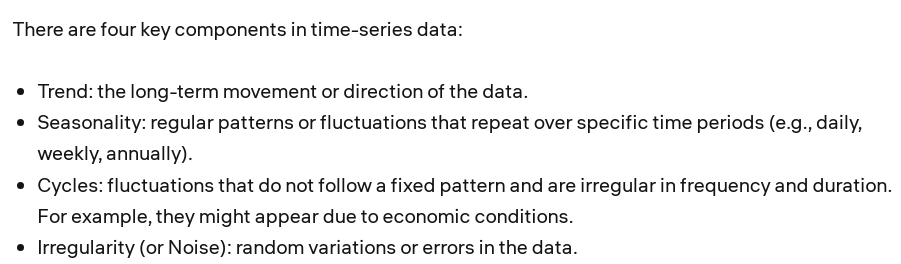

Time series data are usually stored in tabular data formats such as CSV files. Because there is NO fundamental data type for datetime, datetime values are stored as string data (also in some databases, eg, SQL) and parsed as date/time when read into the computer's memory.

example of how the string time data can be parsed using datetime:


In [1]:
from datetime import datetime


In [2]:
datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')

datetime.datetime(2005, 6, 1, 13, 33)

In [4]:
date = datetime.strptime('01/06/2005 13:33', '%d/%m/%Y %H:%M')
date

datetime.datetime(2005, 6, 1, 13, 33)

In [5]:
date.year, date.month, date.day, date.hour, date.minute, date.second

(2005, 6, 1, 13, 33, 0)

In [6]:
str(date)

'2005-06-01 13:33:00'

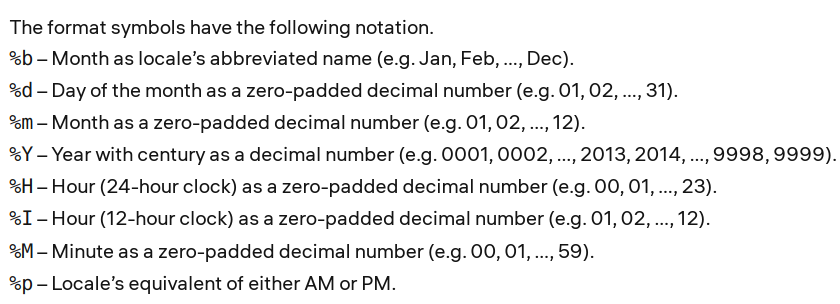

datetime stores both the date and time down to the microsecond if it is provided. datetime.timedelta, or simply timedelta, represents the temporal difference between two datetime objects:

In [7]:
datetime(2021, 2, 14) - datetime(2014, 1, 24, 4, 11)

datetime.timedelta(days=2577, seconds=71340)

most popular format: ISO-8601


example: April 3rd, 2023, 3:47pm in Central European Summer Timezone is 2023-04-03T15:47:00+02:00

# Working with time series


Using pandas we can automatically convert a list of string-type times into datetime objects:

In [14]:
import pandas as pd

datestrs = ["2011-07-06 12:00:00", "2005-01-06 13:33:00"]
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2005-01-06 13:33:00'], dtype='datetime64[ns]', freq=None)

Note that pandas tries to guess the format of data and convert string if the date can be parsed. If the date format is vague, an error will be raised.

In [16]:
try:
    pd.to_datetime(["01/06/05/13/3"])
except Exception as e:
    print("an error occurered:", e)

an error occurered: Unknown datetime string format, unable to parse: 01/06/05/13/3, at position 0


In [17]:
ts = pd.Series([1, 2], index=pd.to_datetime(datestrs))
ts

2011-07-06 12:00:00    1
2005-01-06 13:33:00    2
dtype: int64

In [18]:
ts.index

DatetimeIndex(['2011-07-06 12:00:00', '2005-01-06 13:33:00'], dtype='datetime64[ns]', freq=None)

In [19]:
ts['2005'] #no need full value of index (Allows shortcuts)

2005-01-06 13:33:00    2
dtype: int64

### Data range

In order to create a list of dates in a range one can use pd.date_range. It has 4 primal arguments: start, end, periods and freq, where periods defines an amount of timestamps and freq defines the distance between subsequent stamps. No more than 3 of these arguments can be specified simultaneously. pd.date_range outputs a DatetimeIndex with an indicated length according to a particular frequency.

In [20]:
pd.date_range("2021-03-02", "2021-03-15", periods=3)

DatetimeIndex(['2021-03-02 00:00:00', '2021-03-08 12:00:00',
               '2021-03-15 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [21]:
pd.date_range("2021-03-02", "2021-03-15", freq='5D') #freq= 5 days

DatetimeIndex(['2021-03-02', '2021-03-07', '2021-03-12'], dtype='datetime64[ns]', freq='5D')

In [22]:
pd.date_range(start="2021-03-02", periods=5)

DatetimeIndex(['2021-03-02', '2021-03-03', '2021-03-04', '2021-03-05',
               '2021-03-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets


Frequencies in pandas are composed of a base frequency and a multiplier. Base frequencies are typically referred to by a string alias, like "M" for monthly or "H" for hourly. For each base frequency, there is an object referred to as a date offset. For example, daily frequency can be represented with the Day class and such frequency can be passed to pd.date_range as freq argument.

In [24]:
from pandas.tseries.offsets import Day, Hour, Minute

freq = Day(2)
freq

<2 * Days>

In [25]:
pd.date_range(start="2021-03-02", periods=3, freq=freq)

DatetimeIndex(['2021-03-02', '2021-03-04', '2021-03-06'], dtype='datetime64[ns]', freq='2D')

In [26]:
freq * 3

<6 * Days>

In [27]:
freq * 2.4

<6912 * Minutes>

In [28]:
freq * 3 + Hour(1) + Minute(4) * 3

<8712 * Minutes>

In [29]:
pd.date_range(start="2021-03-02", periods=3, freq="1d2h30min")

DatetimeIndex(['2021-03-02 00:00:00', '2021-03-03 02:30:00',
               '2021-03-04 05:00:00'],
              dtype='datetime64[ns]', freq='1590min')

### Periods and Period Arithmetic


Periods represent time spans, like days, months, quarters, or years. The pd.Period class represents this data type, requiring a string or integer that represents a period of time and a frequency (optionally).

In [30]:
p = pd.Period("2021", freq="D")
p

Period('2021-01-01', 'D')

In [31]:
p - pd.Period("2020", freq="D") #can subtract one period from another

<366 * Days>

In [36]:
p + 3

Period('2021-01-04', 'D')

In [37]:
p + 4

Period('2021-01-05', 'D')

In [39]:
#The frequency of a period can be changed using .asfreq method.
p.asfreq("M")


Period('2021-01', 'M')

# Resampling and frequency conversions

In [41]:
import numpy as np
timestamps = pd.date_range("2021-03-02", periods=10, freq='15D')
ts = pd.Series(np.arange(len(timestamps)), index=timestamps)
ts

2021-03-02    0
2021-03-17    1
2021-04-01    2
2021-04-16    3
2021-05-01    4
2021-05-16    5
2021-05-31    6
2021-06-15    7
2021-06-30    8
2021-07-15    9
Freq: 15D, dtype: int64

In [42]:
ts.resample("M").sum()

/tmp/ipykernel_197261/3634274264.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample("M").sum()


2021-03-31     1
2021-04-30     5
2021-05-31    15
2021-06-30    15
2021-07-31     9
Freq: ME, dtype: int64

### down-sampling

In [43]:
timestamps = pd.date_range("2021-03-02", periods=10, freq="T")
ts = pd.Series(np.arange(len(timestamps)), index=timestamps)
ts

/tmp/ipykernel_197261/1176092765.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  timestamps = pd.date_range("2021-03-02", periods=10, freq="T")


2021-03-02 00:00:00    0
2021-03-02 00:01:00    1
2021-03-02 00:02:00    2
2021-03-02 00:03:00    3
2021-03-02 00:04:00    4
2021-03-02 00:05:00    5
2021-03-02 00:06:00    6
2021-03-02 00:07:00    7
2021-03-02 00:08:00    8
2021-03-02 00:09:00    9
Freq: min, dtype: int64

Now we can downsample the frequency of this data to 5 minutes with the two variations of closed side of each interval: "left" and "right".

In [44]:
ts.resample("5min", closed="left").sum()

2021-03-02 00:00:00    10
2021-03-02 00:05:00    35
Freq: 5min, dtype: int64

In [45]:
ts.resample("5min", closed="right").sum()

2021-03-01 23:55:00     0
2021-03-02 00:00:00    15
2021-03-02 00:05:00    30
Freq: 5min, dtype: int64

In [47]:
#By default each interval is label with its left side. We can change it by specifying label="right".
ts.resample("5min", closed="right", label="right").sum()

2021-03-02 00:00:00     0
2021-03-02 00:05:00    15
2021-03-02 00:10:00    30
Freq: 5min, dtype: int64

### Open-high-low-close (OHLC) resampling

In finance, a popular way to aggregate a time series is to compute four values for each bucket: the first (open), last (close), maximum (high), and minimal (low) values. By using the ohlc aggregate function, you will obtain a DataFrame having columns containing these four aggregates, which are efficiently computed in a single function call

In [48]:
ts.resample("5min").ohlc()

,open,high,low,close
2021-03-02 00:00:00,0,4,0,4
2021-03-02 00:05:00,5,9,5,9


### Upsampling

Upsampling is converting from a lower frequency to a higher frequency, where no aggregation is needed. Let’s take first three timestamps from our 1 minute intervals and try to upsample them to 20 seconds.

In [51]:

ts = ts[:3]
ts.resample("20s").asfreq()

2021-03-02 00:00:00    0.0
2021-03-02 00:00:20    NaN
2021-03-02 00:00:40    NaN
2021-03-02 00:01:00    1.0
2021-03-02 00:01:20    NaN
2021-03-02 00:01:40    NaN
2021-03-02 00:02:00    2.0
Freq: 20s, dtype: float64

pandas filled the values of missing timestamps with NaNs. Suppose instead we want to fill forward each value for the subsequent timestamps. The same filling or interpolation methods which are used in the fillna and reindex methods are available for resampling

In [52]:
ts.resample("20s").ffill()


2021-03-02 00:00:00    0
2021-03-02 00:00:20    0
2021-03-02 00:00:40    0
2021-03-02 00:01:00    1
2021-03-02 00:01:20    1
2021-03-02 00:01:40    1
2021-03-02 00:02:00    2
Freq: 20s, dtype: int64

# Moving window functions

In [53]:
data = pd.read_csv("wineind.csv")
data.head()

,date,winesales
0,1980-01-01,15136
1,1980-02-01,16733
2,1980-03-01,20016
3,1980-04-01,17708
4,1980-05-01,18019


<Axes: >

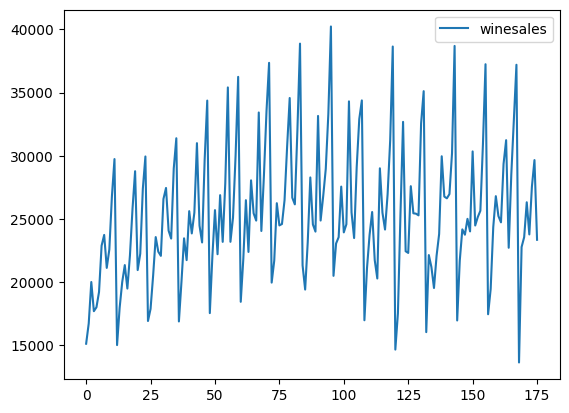

In [57]:
data.plot()

To resample time-series data it is better to use rolling operator, which behaves similarly to resample and groupby. It can be called on a Series or DataFrame along with a window and it provides rolling window calculations over the time-series values.

In [60]:
data.rolling(10).mean()


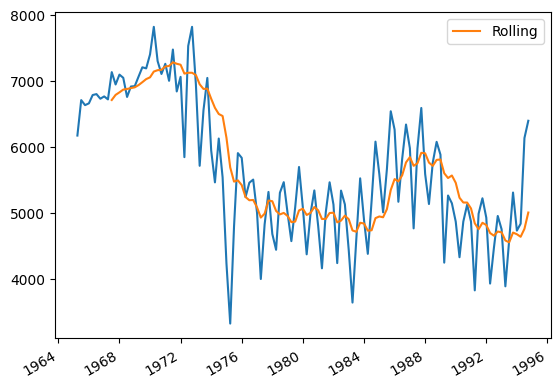

The rolling function also accepts a string indicating a fixed-size time offset rather than a set number of periods. Using this notation can be useful for irregular time series. These are the same strings that you can pass to resample. For example, we could compute a 365-day rolling mean like so:

In [ ]:
data.rolling("365D").mean()

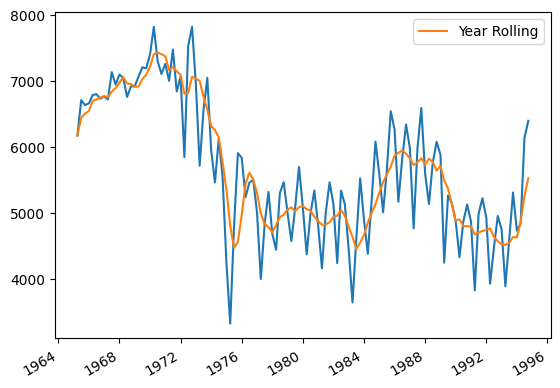

### Exponentially Weighted Functions

An alternative to using a fixed window size with equally weighted observations is to specify a constant decay factor to give more weight to more recent observations. There are a couple of ways to specify the decay factor. A popular one is using a span, which makes the result comparable to a simple moving window function with window size equal to the span.

Since an exponentially weighted statistic places more weight on more recent observations, it “adapts” faster to changes compared with the equal-weighted version.

pandas has the ewm operator (which stands for exponentially weighted moving). Here’s an example comparing a moving average with an exponentially weighted (EW) moving average with window=60 and span=60 respectively. As you can see, EWM approximates the original pattern better.


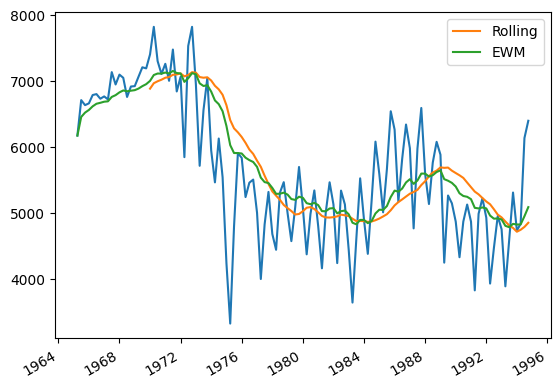

### Time-series analysis methods

There are various methods for analyzing time-series data, which can be broadly categorized into two groups: time-domain methods and frequency-domain methods. We won't discuss them in details, but here are the short descriptions.



### Time-Domain Methods


Autoregression (AR): A linear model that uses past values of the time series to predict future values.

Moving Average (MA): A method that calculates the average of a fixed number of past data points to smooth out noise and short-term fluctuations.

Autoregressive Integrated Moving Average (ARIMA): A combination of AR and MA models that also includes differencing to make the time series stationary.

Exponential Smoothing: A technique that applies different weights to past observations, giving more importance to recent data points.

Decomposition: A method that breaks down the time series into its individual components (trend, seasonality, and noise) to facilitate analysis and forecasting

### Frequency-Domain Methods


Fast Fourier Transform (FFT): A method that transforms time-series data into the frequency domain, allowing for the identification of periodic patterns and cycles.

Wavelet Analysis: A technique that decomposes the time series into time-frequency space, revealing both the frequency content and when these frequencies occur.